In [1]:
import xmltodict
from bs4 import BeautifulSoup
import pprint
import os
import re
import pandas as pd

import skimage
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_folder = os.path.join(os.getcwd(),'IMAGE_DATA')

In [3]:
image_root = os.path.join(image_folder,os.listdir(image_folder)[0])

In [4]:
image_root_lst = os.listdir(image_root)

In [5]:

r = re.compile('(Index)')
# re.findall(r,image_root_lst)
idx_file = list(filter(r.findall,image_root_lst))[0]


In [6]:
with open(os.path.join(image_root,idx_file),'r') as f:
    index_xml = f.read()

In [7]:
# idx_xml = BeautifulSoup(index_xml,'xml')

In [8]:
# ind_file.find('<Col>'==22)
# ind_file.find_all('Wells', {'Col': [22]})

In [9]:
idx_dict = xmltodict.parse(index_xml)

In [10]:
# pprint.pprint(idx_dict['EvaluationInputData'])

In [11]:
idx_dict['EvaluationInputData'].keys()

dict_keys(['@Version', '@xmlns', '@xmlns:xsd', '@xmlns:xsi', 'User', 'InstrumentType', 'Plates', 'Wells', 'Maps', 'Images'])

In [68]:
idx_dict['EvaluationInputData']['Plates']['Plate']['PlateID']

'PTL_00000916'

In [12]:
mod_well_lst_to_df = []

for cnt in range(len(idx_dict['EvaluationInputData']['Wells']['Well'])):
    well_temp_df = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Wells']['Well'][cnt],orient='columns')
    well_temp_df['Image'] = [item.pop('@id') for item in well_temp_df['Image']]
    mod_well_lst_to_df.append(well_temp_df)
    well_table=pd.concat(mod_well_lst_to_df,axis=0)

In [13]:
well_table.reset_index(drop=True,inplace=True)

In [14]:
well_table.head()

,id,Col,Row,SublayoutID,Image
0,0101,1,1,1,0101K1F1P1R1
1,0101,1,1,1,0101K1F1P1R2
2,0101,1,1,1,0101K1F2P1R1
3,0101,1,1,1,0101K1F2P1R2
4,0101,1,1,1,0101K1F3P1R1


In [15]:
#channelID 1 = HOECHST
#channelID 2 = mCherry
image_table = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Images']['Image'],orient='columns')
image_table.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
0,0101K1F1P1R1,None,1,1,1,1,1,1,1,1,2022-11-15T22:28:38.0496000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0,r01c01-1719728043.tiff
1,0101K1F1P1R2,None,1,1,2,1,1,1,1,1,2022-11-15T22:28:38.6892000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0.639600038528,r01c01-1299190045.tiff
2,0101K1F2P1R1,None,1,1,1,2,1,1,1,1,2022-11-15T22:28:39.4380000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.38840007782,r01c01-0436032609.tiff
3,0101K1F2P1R2,None,1,1,2,2,1,1,1,1,2022-11-15T22:28:39.9684000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.91880011559,r01c01-0695440784.tiff
4,0101K1F3P1R1,None,1,1,1,3,1,1,1,1,2022-11-15T22:28:40.8576000Z,"{'@Unit': 'm', '#text': '0.1349020074760486'}",2.80800008774,r01c01-1938356943.tiff


In [122]:
p_ctl_metadata = image_table[image_table['Col']=='23']
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
132,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,2022-11-15T22:53:45.4776097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.42800903,r01c23-0880918002.tiff
133,0123K1F1P1R2,None,1,23,2,1,1,1,1,1,2022-11-15T22:53:46.0080097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.95840907,r01c23-0757806701.tiff
134,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,2022-11-15T22:53:46.9596097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1508.91000915,r01c23-0841017528.tiff
135,0123K1F2P1R2,None,1,23,2,2,1,1,1,1,2022-11-15T22:53:47.4900097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1509.44040918,r01c23-0244046167.tiff
136,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,2022-11-15T22:53:48.8628097Z,"{'@Unit': 'm', '#text': '0.13500368980289193'}",1510.81320906,r01c23-1969109181.tiff


In [123]:
p_ctl_metadata['image_root_folder'] = image_root

C:\Users\marfok\AppData\Local\Temp\ipykernel_2248\1373054125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['image_root_folder'] = image_root


In [124]:
# get HOESCHT image

In [125]:
p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[0] 

'r01c23-0757806701.tiff'

In [126]:
p_ctl_metadata

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder
132,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,2022-11-15T22:53:45.4776097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.42800903,r01c23-0880918002.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
133,0123K1F1P1R2,None,1,23,2,1,1,1,1,1,2022-11-15T22:53:46.0080097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.95840907,r01c23-0757806701.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
134,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,2022-11-15T22:53:46.9596097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1508.91000915,r01c23-0841017528.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
135,0123K1F2P1R2,None,1,23,2,2,1,1,1,1,2022-11-15T22:53:47.4900097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1509.44040918,r01c23-0244046167.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
136,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,2022-11-15T22:53:48.8628097Z,"{'@Unit': 'm', '#text': '0.13500368980289193'}",1510.81320906,r01c23-1969109181.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,1623K1F1P1R2,None,16,23,2,1,1,1,1,1,2022-11-15T22:54:57.1440101Z,"{'@Unit': 'm', '#text': '0.13491828049069948'}",1579.09441018,r16c23-0794370621.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2294,1623K1F2P1R1,None,16,23,1,2,1,1,1,1,2022-11-15T22:54:57.8460101Z,"{'@Unit': 'm', '#text': '0.13492304923499754'}",1579.79641008,r16c23-1431876070.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2295,1623K1F2P1R2,None,16,23,2,2,1,1,1,1,2022-11-15T22:54:58.3764101Z,"{'@Unit': 'm', '#text': '0.13492304923499754'}",1580.32681012,r16c23-1948832677.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2296,1623K1F3P1R1,None,16,23,1,3,1,1,1,1,2022-11-15T22:54:59.5932101Z,"{'@Unit': 'm', '#text': '0.134915697317376'}",1581.5436101,r16c23-1295389016.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


Text(0.5, 1.0, 'mCherry')

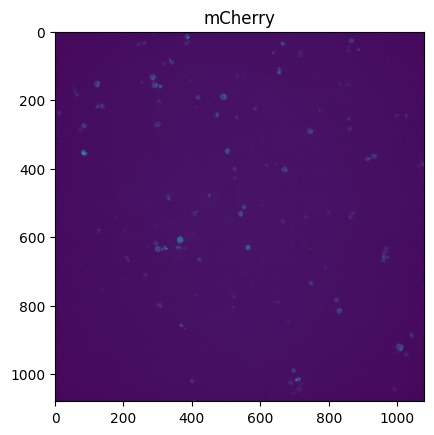

In [127]:
im1 = os.path.join(p_ctl_metadata['image_root_folder'].iloc[0],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[0] )
plt.imshow(skimage.io.imread(im1))
plt.title('mCherry')

In [128]:
len(p_ctl_metadata['image_root_folder'])

96

In [129]:
len(p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'])

48

In [130]:
trim_pctl = p_ctl_metadata[['id','Row','Col','ChannelID','FieldID','URL','image_root_folder']]
h_df = trim_pctl[trim_pctl.ChannelID.eq('1')] 
m_df = trim_pctl[trim_pctl.ChannelID.eq('2')]

In [131]:
# 16 total images
display(h_df.head())
print(h_df.shape)

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
132,0123K1F1P1R1,1,23,1,1,r01c23-0880918002.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
134,0123K1F2P1R1,1,23,1,2,r01c23-0841017528.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
136,0123K1F3P1R1,1,23,1,3,r01c23-1969109181.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
276,0223K1F1P1R1,2,23,1,1,r02c23-1406791062.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
278,0223K1F2P1R1,2,23,1,2,r02c23-0004632758.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


(48, 7)


In [132]:
display(m_df.head())
print(m_df.shape)

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
133,0123K1F1P1R2,1,23,2,1,r01c23-0757806701.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
135,0123K1F2P1R2,1,23,2,2,r01c23-0244046167.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
137,0123K1F3P1R2,1,23,2,3,r01c23-1784844210.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
277,0223K1F1P1R2,2,23,2,1,r02c23-0692686621.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
279,0223K1F2P1R2,2,23,2,2,r02c23-0278783794.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


(48, 7)


In [133]:
p_ctl_metadata.shape

(96, 15)

In [134]:
lst = []
for i in range(p_ctl_metadata.shape[0]//2):
    # print('mCherry image path: ', os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[i]))
    # print('HOECHST image path: ', os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('1')]['URL'].iloc[i]))
    im1 = os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[i])
    im2 = os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('1')]['URL'].iloc[i])
    lst.append(im1)

In [135]:
len(lst)

48

In [136]:
p_ctl_metadata['compound'] = 'POS-000001'

C:\Users\marfok\AppData\Local\Temp\ipykernel_2248\1735611418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['compound'] = 'POS-000001'


In [137]:
p_ctl_metadata['compound_uM'] = 'uM'

C:\Users\marfok\AppData\Local\Temp\ipykernel_2248\2743659340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['compound_uM'] = 'uM'


In [138]:
p_ctl_metadata['table_nr'] = 'Blank'

C:\Users\marfok\AppData\Local\Temp\ipykernel_2248\2764959845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['table_nr'] = 'Blank'


In [139]:
p_ctl_metadata.reset_index(drop=True,inplace=True)

In [140]:
p_ctl_metadata.loc[0, 'compound']

'POS-000001'

In [141]:
j =[]
for i,row in p_ctl_metadata.iterrows():
    j.append(p_ctl_metadata.loc[i,'compound'])
       

In [142]:
p_ctl_metadata['pseudoclass'] = ['class_{}'.format(i) for i in range(p_ctl_metadata.shape[0])]

C:\Users\marfok\AppData\Local\Temp\ipykernel_2248\1450283836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['pseudoclass'] = ['class_{}'.format(i) for i in range(p_ctl_metadata.shape[0])]


In [143]:
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder,compound,compound_uM,table_nr,pseudoclass
0,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,2022-11-15T22:53:45.4776097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.42800903,r01c23-0880918002.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_0
1,0123K1F1P1R2,None,1,23,2,1,1,1,1,1,2022-11-15T22:53:46.0080097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.95840907,r01c23-0757806701.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_1
2,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,2022-11-15T22:53:46.9596097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1508.91000915,r01c23-0841017528.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_2
3,0123K1F2P1R2,None,1,23,2,2,1,1,1,1,2022-11-15T22:53:47.4900097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1509.44040918,r01c23-0244046167.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_3
4,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,2022-11-15T22:53:48.8628097Z,"{'@Unit': 'm', '#text': '0.13500368980289193'}",1510.81320906,r01c23-1969109181.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_4


In [144]:
p_ctl_metadata

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder,compound,compound_uM,table_nr,pseudoclass
0,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,2022-11-15T22:53:45.4776097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.42800903,r01c23-0880918002.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_0
1,0123K1F1P1R2,None,1,23,2,1,1,1,1,1,2022-11-15T22:53:46.0080097Z,"{'@Unit': 'm', '#text': '0.13500731738859018'}",1507.95840907,r01c23-0757806701.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_1
2,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,2022-11-15T22:53:46.9596097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1508.91000915,r01c23-0841017528.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_2
3,0123K1F2P1R2,None,1,23,2,2,1,1,1,1,2022-11-15T22:53:47.4900097Z,"{'@Unit': 'm', '#text': '0.13500997717070254'}",1509.44040918,r01c23-0244046167.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_3
4,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,2022-11-15T22:53:48.8628097Z,"{'@Unit': 'm', '#text': '0.13500368980289193'}",1510.81320906,r01c23-1969109181.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1623K1F1P1R2,None,16,23,2,1,1,1,1,1,2022-11-15T22:54:57.1440101Z,"{'@Unit': 'm', '#text': '0.13491828049069948'}",1579.09441018,r16c23-0794370621.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_91
92,1623K1F2P1R1,None,16,23,1,2,1,1,1,1,2022-11-15T22:54:57.8460101Z,"{'@Unit': 'm', '#text': '0.13492304923499754'}",1579.79641008,r16c23-1431876070.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_92
93,1623K1F2P1R2,None,16,23,2,2,1,1,1,1,2022-11-15T22:54:58.3764101Z,"{'@Unit': 'm', '#text': '0.13492304923499754'}",1580.32681012,r16c23-1948832677.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_93
94,1623K1F3P1R1,None,16,23,1,3,1,1,1,1,2022-11-15T22:54:59.5932101Z,"{'@Unit': 'm', '#text': '0.134915697317376'}",1581.5436101,r16c23-1295389016.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_94


In [145]:
# p_ctl_metadata.columns[1:]

In [146]:
# p_ctl_metadata[p_ctl_metadata.ChannelID.eq('1')]['URL']

In [147]:
# pd.pivot(p_ctl_metadata,index=None,columns='id',values = )

In [148]:
p_ctl_metadata.columns

Index(['id', 'State', 'Row', 'Col', 'ChannelID', 'FieldID', 'PlaneID',
       'TimepointID', 'SequenceID', 'GroupID', 'AbsTime', 'AbsPositionZ',
       'MeasurementTimeOffset', 'URL', 'image_root_folder', 'compound',
       'compound_uM', 'table_nr', 'pseudoclass'],
      dtype='object')

In [149]:
p_ctl_metadata.to_csv('sample_data.csv')

#### create new dataframe with type of cell stain as a column

In [150]:
h_df = p_ctl_metadata[p_ctl_metadata.ChannelID.eq('1')]
m_df = p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]

h = h_df
m = m_df[['id','Row','Col','URL','FieldID','ChannelID']]
print(h.shape)
print(m.shape)

(48, 19)
(48, 6)


In [151]:
mer_df = h.merge(m.drop_duplicates(['Row','Col','FieldID']),\
               on=['Row','Col','FieldID'],\
              how='inner')

In [152]:
mer_df.shape

(48, 22)

In [153]:
mer_df.columns

Index(['id_x', 'State', 'Row', 'Col', 'ChannelID_x', 'FieldID', 'PlaneID',
       'TimepointID', 'SequenceID', 'GroupID', 'AbsTime', 'AbsPositionZ',
       'MeasurementTimeOffset', 'URL_x', 'image_root_folder', 'compound',
       'compound_uM', 'table_nr', 'pseudoclass', 'id_y', 'URL_y',
       'ChannelID_y'],
      dtype='object')

In [154]:
mer_df.rename(columns={'URL_x':'HOECHST_IMAGE','URL_y':'mCHERRY_IMAGE',
                       'id_x':'id_HOECHST', 'id_y':'id_mCHERRY',
                       'ChannelID_x':'ChannelID_HOECHST', 'ChannelID_y':'ChannelID_mCHERRY'},inplace=True)

In [155]:
mer_df['plate'] = idx_dict['EvaluationInputData']['Plates']['Plate']['PlateID']

In [156]:
mer_df.columns

Index(['id_HOECHST', 'State', 'Row', 'Col', 'ChannelID_HOECHST', 'FieldID',
       'PlaneID', 'TimepointID', 'SequenceID', 'GroupID', 'AbsTime',
       'AbsPositionZ', 'MeasurementTimeOffset', 'HOECHST_IMAGE',
       'image_root_folder', 'compound', 'compound_uM', 'table_nr',
       'pseudoclass', 'id_mCHERRY', 'mCHERRY_IMAGE', 'ChannelID_mCHERRY',
       'plate'],
      dtype='object')

In [157]:
mer_df.head()

,id_HOECHST,State,Row,Col,ChannelID_HOECHST,FieldID,PlaneID,TimepointID,SequenceID,GroupID,...,HOECHST_IMAGE,image_root_folder,compound,compound_uM,table_nr,pseudoclass,id_mCHERRY,mCHERRY_IMAGE,ChannelID_mCHERRY,plate
0,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,...,r01c23-0880918002.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_0,0123K1F1P1R2,r01c23-0757806701.tiff,2,PTL_00000916
1,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,...,r01c23-0841017528.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_2,0123K1F2P1R2,r01c23-0244046167.tiff,2,PTL_00000916
2,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,...,r01c23-1969109181.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_4,0123K1F3P1R2,r01c23-1784844210.tiff,2,PTL_00000916
3,0223K1F1P1R1,None,2,23,1,1,1,1,1,1,...,r02c23-1406791062.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_6,0223K1F1P1R2,r02c23-0692686621.tiff,2,PTL_00000916
4,0223K1F2P1R1,None,2,23,1,2,1,1,1,1,...,r02c23-0004632758.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_8,0223K1F2P1R2,r02c23-0278783794.tiff,2,PTL_00000916


In [165]:
# alpha = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
# numeric = list(np.arange(24)+1)

In [166]:
well_lst = ['A23','B23','C23','D23','E23','F23','G23','H23','I23','J23','K23','L23','M23','N23','O23','P23']

In [167]:
mer_df['well'] = np.repeat(well_lst,3)

In [168]:
mer_df.head()

,id_HOECHST,State,Row,Col,ChannelID_HOECHST,FieldID,PlaneID,TimepointID,SequenceID,GroupID,...,image_root_folder,compound,compound_uM,table_nr,pseudoclass,id_mCHERRY,mCHERRY_IMAGE,ChannelID_mCHERRY,plate,well
0,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,...,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_0,0123K1F1P1R2,r01c23-0757806701.tiff,2,PTL_00000916,A23
1,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,...,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_2,0123K1F2P1R2,r01c23-0244046167.tiff,2,PTL_00000916,A23
2,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,...,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_4,0123K1F3P1R2,r01c23-1784844210.tiff,2,PTL_00000916,A23
3,0223K1F1P1R1,None,2,23,1,1,1,1,1,1,...,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_6,0223K1F1P1R2,r02c23-0692686621.tiff,2,PTL_00000916,B23
4,0223K1F2P1R1,None,2,23,1,2,1,1,1,1,...,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,class_8,0223K1F2P1R2,r02c23-0278783794.tiff,2,PTL_00000916,B23


In [181]:
moa_lst = ['best_guess_1','best_guess_2']
add_me = ['undefined' for i in range(46)]

moa_lst.extend(add_me)

mer_df['moa'] = moa_lst

In [182]:
mer_df.head()

,id_HOECHST,State,Row,Col,ChannelID_HOECHST,FieldID,PlaneID,TimepointID,SequenceID,GroupID,...,compound,compound_uM,table_nr,pseudoclass,id_mCHERRY,mCHERRY_IMAGE,ChannelID_mCHERRY,plate,well,moa
0,0123K1F1P1R1,None,1,23,1,1,1,1,1,1,...,POS-000001,uM,Blank,class_0,0123K1F1P1R2,r01c23-0757806701.tiff,2,PTL_00000916,A23,best_guess_1
1,0123K1F2P1R1,None,1,23,1,2,1,1,1,1,...,POS-000001,uM,Blank,class_2,0123K1F2P1R2,r01c23-0244046167.tiff,2,PTL_00000916,A23,best_guess_2
2,0123K1F3P1R1,None,1,23,1,3,1,1,1,1,...,POS-000001,uM,Blank,class_4,0123K1F3P1R2,r01c23-1784844210.tiff,2,PTL_00000916,A23,undefined
3,0223K1F1P1R1,None,2,23,1,1,1,1,1,1,...,POS-000001,uM,Blank,class_6,0223K1F1P1R2,r02c23-0692686621.tiff,2,PTL_00000916,B23,undefined
4,0223K1F2P1R1,None,2,23,1,2,1,1,1,1,...,POS-000001,uM,Blank,class_8,0223K1F2P1R2,r02c23-0278783794.tiff,2,PTL_00000916,B23,undefined


In [183]:
# mer_df.to_csv('pivoted_channelID_data.csv')

In [ ]:


# # r = re.compile('.*r04c11')
# r = re.compile('(Index)')

# with open (list(filter(r.findall,im_lst))[0],'r') as f:
#     z = f.read()
# z


# import numpy as np
# samp = np.array([21,22,33,4,5,6,7,87])
# mask = np.array([0,0,0,1,1,1,1,0],dtype=bool)
# samp[mask]

